Iniciando criptografia ECC: arquivo 218
Assinatura ECC finalizada: arquivo 218
Tempo de execução: 0.00188 segundos

Iniciando criptografia ECC: arquivo 219
Assinatura ECC finalizada: arquivo 219
Tempo de execução: 0.00199 segundos

Iniciando criptografia ECC: arquivo 220
Assinatura ECC finalizada: arquivo 220
Tempo de execução: 0.00235 segundos

Iniciando criptografia ECC: arquivo 221
Assinatura ECC finalizada: arquivo 221
Tempo de execução: 0.00178 segundos

Iniciando criptografia ECC: arquivo 222
Assinatura ECC finalizada: arquivo 222
Tempo de execução: 0.00164 segundos

Iniciando criptografia ECC: arquivo 223
Assinatura ECC finalizada: arquivo 223
Tempo de execução: 0.00147 segundos

Iniciando criptografia ECC: arquivo 224
Assinatura ECC finalizada: arquivo 224
Tempo de execução: 0.00157 segundos

Iniciando criptografia ECC: arquivo 225
Assinatura ECC finalizada: arquivo 225
Tempo de execução: 0.00152 segundos

Iniciando criptografia ECC: arquivo 226
Assinatura ECC finalizada: arqui

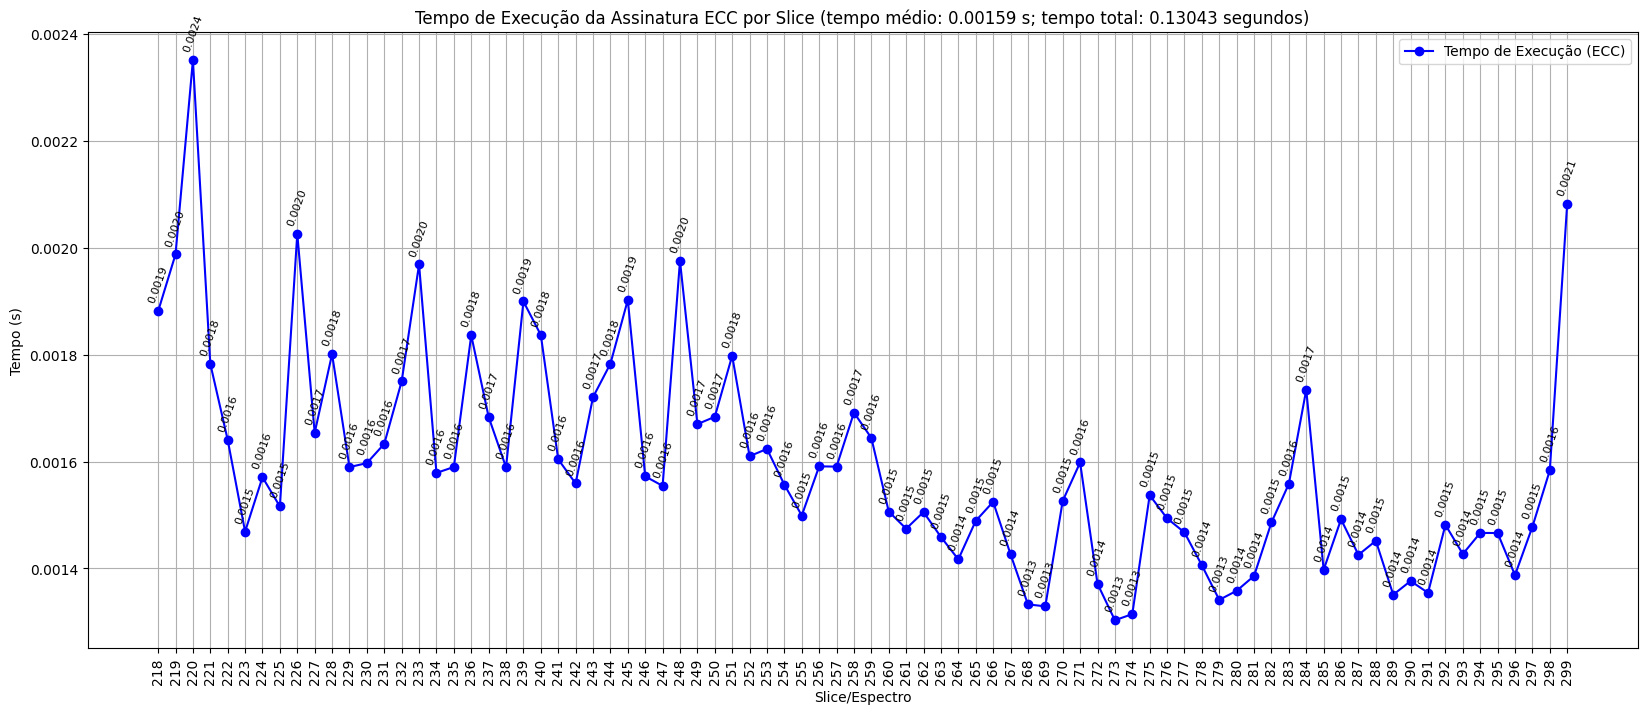

In [4]:
from Crypto.PublicKey import ECC
from Crypto.Signature import DSS
from Crypto.Hash import SHA256
import time
import numpy as np
import matplotlib.pyplot as plt

# Geração das chaves ECC
key = ECC.generate(curve='P-256')
private_key = key
public_key = key.public_key()

with open("ecc_private.pem", "wt") as f:
    f.write(private_key.export_key(format='PEM'))

with open("ecc_public.pem", "wt") as f:
    f.write(public_key.export_key(format='PEM'))

tempos_execucao = []
execucoes = []

for rodagem in range(218, 300):
    inicio = time.perf_counter()
    print(f'Iniciando criptografia ECC: arquivo {rodagem}')

    dicom_path = f'C:\\Users\\CarlosChinen\\OneDrive\\Main\\FEI\\TCC\\Criptografia\\criptografia\\dicom_fourier_spectrum_dataset\\spectrum_slice_{rodagem}.png'

    with open(dicom_path, "rb") as dicom_file:
        image_data = dicom_file.read()

    # Em vez de criptografar a imagem, geramos um hash e assinamos com ECC
    hash_obj = SHA256.new(image_data)
    signer = DSS.new(private_key, 'fips-186-3')
    signature = signer.sign(hash_obj)

    # Armazena a assinatura e o hash da imagem
    with open(f"ECC_crypto_spectrum_metrics/ECC_spectrum_assinado_{rodagem}.sig", "wb") as out_file:
        out_file.write(signature)

    fim = time.perf_counter()
    tempo_execucao = fim - inicio
    tempos_execucao.append(tempo_execucao)
    execucoes.append(rodagem)

    print(f'Assinatura ECC finalizada: arquivo {rodagem}')
    print(f"Tempo de execução: {tempo_execucao:.5f} segundos\n")

print(f'\nTempo médio de execução: {np.mean(tempos_execucao):.5f}')

plt.figure(figsize=(20, 8))
plt.plot(execucoes, tempos_execucao, marker='o', linestyle='-', color='blue', label='Tempo de Execução (ECC)')

for x, y in zip(execucoes, tempos_execucao):
    plt.text(x, y + 0.00005, f'{y:.4f}', ha='center', va='center', fontsize=8, rotation=70)

plt.xticks(execucoes, rotation=90)
plt.xlabel('Slice/Espectro')
plt.ylabel('Tempo (s)')
plt.title(f'Tempo de Execução da Assinatura ECC por Slice (tempo médio: {np.mean(tempos_execucao):.5f} s; tempo total: {np.sum(tempos_execucao):.5f} segundos)')
plt.legend()
plt.grid(True)
plt.savefig('output_images/graph_tempo_execucao_ecc_assinatura_espectro.png')
plt.show()
